<a href="https://colab.research.google.com/github/RahaddyanRamaWijaya/Data-Mining-/blob/main/Rama_Tugas_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Kecanduan dan Kesehatan Mental

# ANALISA DATASET

In [2]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sea
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
data = pd.read_csv('addiction_population_data.csv')
print(data.head())

   id              name  age  gender       country         city  \
0   1     Michael Bates   66   Other         Yemen  Martinmouth   
1   2    Brian Thompson   29    Male  Saudi Arabia  Harperhaven   
2   3     Steven Little   75    Male          Togo     Chanport   
3   4   Michael Mathews   35   Other          Togo   North Cory   
4   5  Nicholas Sanchez   38  Female       Morocco   Danielberg   

  education_level employment_status  annual_income_usd     marital_status  \
0       Secondary           Student              45595            Married   
1         Primary     Self-Employed             145842             Single   
2    Postgraduate        Unemployed             162480             Single   
3      University        Unemployed              16023  In a relationship   
4         College     Self-Employed              62933  In a relationship   

   ...  attempts_to_quit_smoking  attempts_to_quit_drinking  \
0  ...                         6                          2   
1  ...  

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3000 non-null   int64  
 1   name                       3000 non-null   object 
 2   age                        3000 non-null   int64  
 3   gender                     3000 non-null   object 
 4   country                    3000 non-null   object 
 5   city                       3000 non-null   object 
 6   education_level            2580 non-null   object 
 7   employment_status          3000 non-null   object 
 8   annual_income_usd          3000 non-null   int64  
 9   marital_status             3000 non-null   object 
 10  children_count             3000 non-null   int64  
 11  smokes_per_day             3000 non-null   int64  
 12  drinks_per_week            3000 non-null   int64  
 13  age_started_smoking        3000 non-null   int64

In [16]:
data.isnull().head()

,id,name,age,gender,country,city,education_level,employment_status,annual_income_usd,marital_status,...,attempts_to_quit_smoking,attempts_to_quit_drinking,has_health_issues,mental_health_status,exercise_frequency,diet_quality,sleep_hours,bmi,social_support,therapy_history
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
data.count()

,0
id,3000
name,3000
age,3000
gender,3000
country,3000
city,3000
education_level,2580
employment_status,3000
annual_income_usd,3000
marital_status,3000


# Analisis Eksploratori (EDA)

Statistik Deskriptif


Statistik deskriptif:
       smokes_per_day  drinks_per_week          bmi          age
count     3000.000000      3000.000000  3000.000000  3000.000000
mean        10.034000         5.002333    25.170133    46.654333
std          3.108386         2.214037     5.013345    18.740880
min          2.000000         0.000000     9.100000    15.000000
25%          8.000000         3.000000    21.900000    31.000000
50%         10.000000         5.000000    25.200000    47.000000
75%         12.000000         6.000000    28.400000    63.000000
max         21.000000        14.000000    43.900000    79.000000


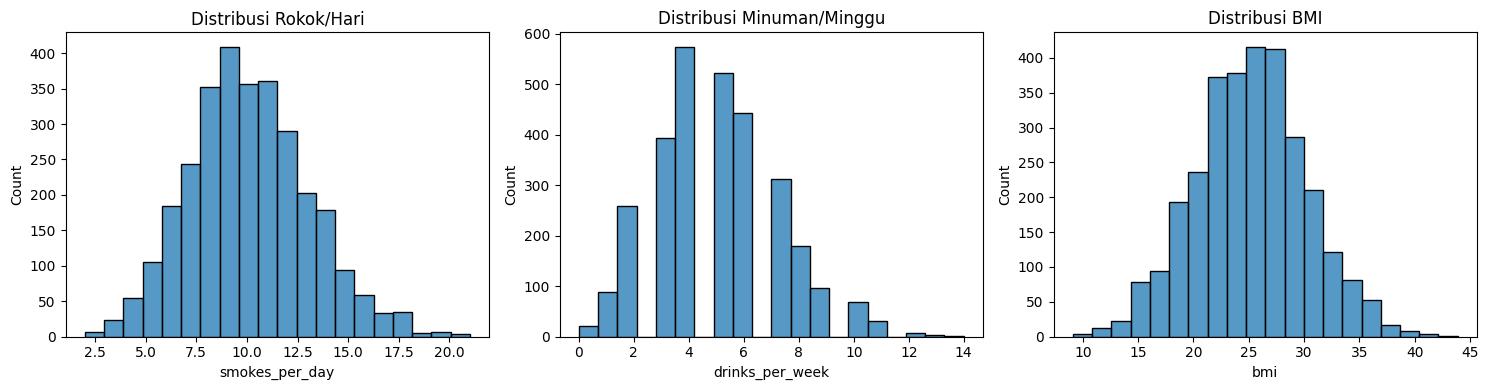

In [18]:
print("\nStatistik deskriptif:")
print(df[['smokes_per_day', 'drinks_per_week', 'bmi', 'age']].describe())

# Visualisasi distribusi
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.histplot(df['smokes_per_day'], bins=20)
plt.title('Distribusi Rokok/Hari')

plt.subplot(1,3,2)
sns.histplot(df['drinks_per_week'], bins=20)
plt.title('Distribusi Minuman/Minggu')

plt.subplot(1,3,3)
sns.histplot(df['bmi'], bins=20)
plt.title('Distribusi BMI')
plt.tight_layout()
plt.show()

Analisis Kesehatan Mental


Distribusi Kesehatan Mental:
mental_health_status
Average    0.339
Good       0.334
Poor       0.327
Name: proportion, dtype: float64


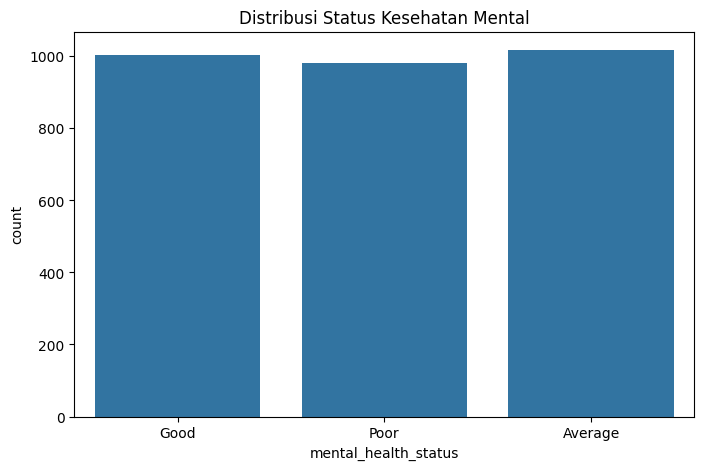

In [19]:
mental_health_counts = df['mental_health_status'].value_counts(normalize=True)
print("\nDistribusi Kesehatan Mental:")
print(mental_health_counts)

plt.figure(figsize=(8,5))
sns.countplot(x='mental_health_status', data=df)
plt.title('Distribusi Status Kesehatan Mental')
plt.show()

# RANDOM FOREST

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Baca data - Assuming 'df' is already loaded in a previous cell
# df = pd.read_csv('addiction_population_data.csv')

# Define features (X) and target (y)
X = df[['age', 'gender', 'smokes_per_day', 'drinks_per_week', 'bmi',
        'exercise_frequency', 'diet_quality', 'sleep_hours']]
y = df['mental_health_status']

# Ubah fitur kategorikal menjadi numerik
X = pd.get_dummies(X, columns=['gender', 'exercise_frequency', 'diet_quality'], drop_first=True)

# Label encode target (mental_health_status)
le = LabelEncoder()
y = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Akurasi: 0.36833333333333335

Classification Report:
              precision    recall  f1-score   support

     Average       0.33      0.39      0.36       194
        Good       0.40      0.42      0.41       206
        Poor       0.38      0.29      0.33       200

    accuracy                           0.37       600
   macro avg       0.37      0.37      0.37       600
weighted avg       0.37      0.37      0.37       600



In [45]:
# Membuat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
rf_model.fit(X_train, y_train)

# Memprediksi pada data test
y_pred = rf_model.predict(X_test)

In [46]:
# Evaluasi performa model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                  index = X.columns,
                                  columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances.head(10))

Accuracy: 0.4922222222222222

Classification Report:
              precision    recall  f1-score   support

       False       0.48      0.56      0.52       441
        True       0.50      0.42      0.46       459

    accuracy                           0.49       900
   macro avg       0.49      0.49      0.49       900
weighted avg       0.49      0.49      0.49       900


Feature Importances:
                          importance
city                        0.080645
annual_income_usd           0.077913
country                     0.074537
bmi                         0.074381
age                         0.067541
sleep_hours                 0.067522
age_started_drinking        0.059606
age_started_smoking         0.057772
smokes_per_day              0.048112
attempts_to_quit_smoking    0.044144


# VISUALISASI

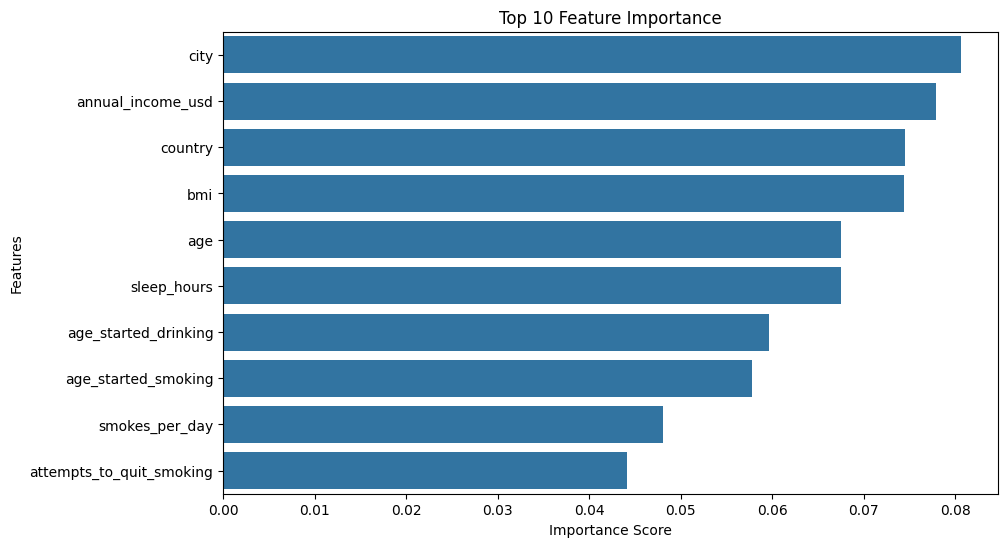

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.head(10)['importance'],
            y=feature_importances.head(10).index)
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# KESIMPULAN

**Laporan Kesimpulan: Data Populasi dan Kecanduan**
1. Informasi Umum
Jumlah Data: 3.000 baris
Jumlah Fitur: 25 kolom
Tipe Data: Kombinasi numerik (umur, BMI, pendapatan), kategorikal (status pernikahan, gender), dan boolean (masalah kesehatan).

2. Aspek yang Dicakup
Demografi: age, gender, country, city, education_level, employment_status, annual_income_usd, marital_status, children_count.
Kebiasaan adiktif: smokes_per_day, drinks_per_week, age_started_smoking, age_started_drinking, attempts_to_quit_smoking, attempts_to_quit_drinking.
Kesehatan: has_health_issues, mental_health_status, exercise_frequency, diet_quality, sleep_hours, bmi, therapy_history.
Sosial dan Dukungan: social_support.

3. Potensi Analisis
Data ini dapat digunakan untuk:
Memprediksi tingkat kecanduan berdasarkan faktor usia, kesehatan, dan sosial.
Menilai pengaruh kesehatan mental, dukungan sosial, dan terapi terhadap kecenderungan adiksi.
Menggali korelasi antara gaya hidup (seperti olahraga, pola makan, tidur) dan tingkat kecanduan.

4. Kekuatan Dataset
Ukuran data cukup besar untuk dilakukan pembelajaran mesin.
Lengkap dari sisi fitur: mencakup faktor biologis, psikologis, dan sosial.
Tidak ada missing value (semua kolom memiliki data lengkap).

5. Rekomendasi Langkah Selanjutnya
Visualisasi: Buat grafik distribusi umur, kebiasaan merokok/minum, dan BMI.
Modeling: Terapkan model prediktif seperti Random Forest atau Logistic Regression untuk memprediksi variabel target tertentu (misalnya prediksi usaha berhenti merokok).
Preprocessing: Normalisasi data numerik dan encoding fitur kategorikal untuk digunakan dalam algoritma ML.

